In [34]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

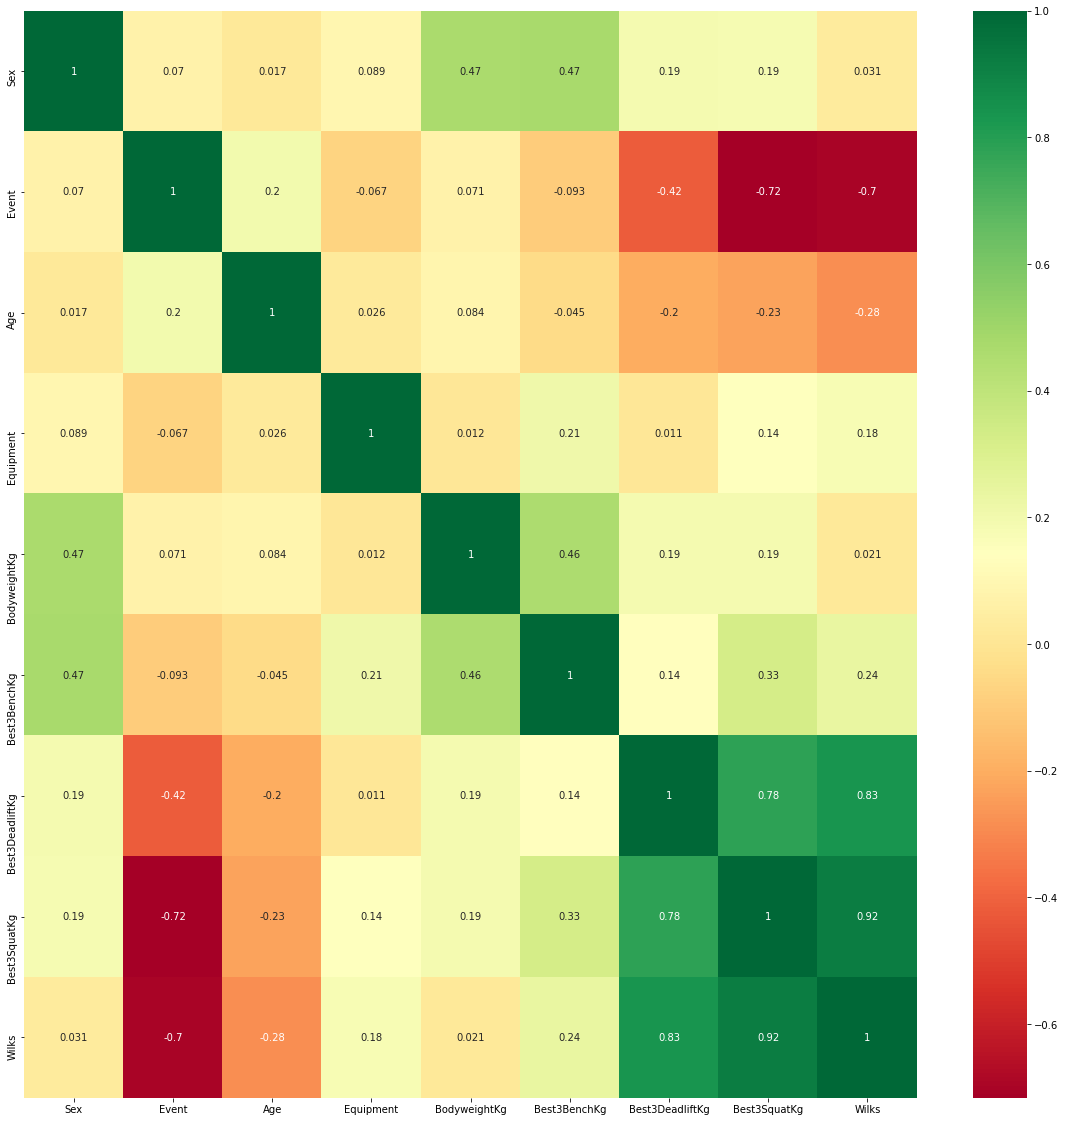

In [65]:
# Sampling 20,000 data entries
n = 767672 
s = 20000
skip = sorted(random.sample(range(1,n+1),n-s))
data = pd.read_csv('zeroopenpowerlifting.csv', skiprows=skip)

data = data.drop(columns=['Name', 'AgeClass', 'Division',
                          'Squat4Kg', 'Bench4Kg', 'Deadlift4Kg',
                          'Place', 'Tested', 'Country', 'Federation',
                          'Date', 'WeightClassKg'])

# Convert data
sex = {'M': 1, 'F': 0, 'Mx': 3}
equipment = {'Raw': 0, 'Wraps': 1, 'Multi-ply': 2, 'Single-ply': 3, 'Straps': 4}
event = {'SBD': 0, 'S': 1, 'B': 2, 'D': 3, 'SB': 4, 'SD': 5, 'BD': 6}

data.Event = [event[item] for item in data.Event]
data.Sex = [sex[item] for item in data.Sex]
data.Equipment = [equipment[item] for item in data.Equipment]

# Scale it
scaler = MinMaxScaler(feature_range=(0,1))
data[['Sex', 'Event','Age', 'Equipment', 'BodyweightKg',
        'Wilks', 'Best3BenchKg', 'Best3DeadliftKg', 'Best3SquatKg', 'TotalKg', 'Squat1Kg',
                          'Squat2Kg', 'Squat3Kg','Bench1Kg', 'Bench2Kg', 'IPFPoints',
                          'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg',
                          'Deadlift3Kg', 'McCulloch', 'Glossbrenner']] = scaler.fit_transform(data[['Sex', 'Event','Age', 'Equipment', 'BodyweightKg',
        'Wilks', 'Best3BenchKg', 'Best3DeadliftKg', 'Best3SquatKg', 'TotalKg', 'Squat1Kg',
                          'Squat2Kg', 'Squat3Kg','Bench1Kg', 'Bench2Kg', 'IPFPoints',
                          'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg',
                          'Deadlift3Kg', 'McCulloch', 'Glossbrenner']])

# Select the features you want to look at
data = data[['Sex', 'Event','Age', 'Equipment', 'BodyweightKg', 'Best3BenchKg', 'Best3DeadliftKg', 'Best3SquatKg', 'Wilks']]

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#Plot it
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")